In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


In [2]:
info_csv = 'ERR505104.containment-comparisons.csv'
df = pd.read_csv(info_csv, index_col=0)

In [3]:
df

,genome,n_chrom,n_snps,n_genome_bp,n_missed_bp,f_missed_bp,n_covered_bp,f_covered_bp,avg_coverage,effective_coverage,...,n_diff3_read,% map_to_assembly,metagenome,trim_cont,assem_cont,mapassem_cont,assem_v_trim,mapassem_v_trim,mapassem_v_assem,coverage_category
0,GCA_018365095,200,13579,2787952,553178,0.198417,2234774,0.801583,2.100456,2.620386,...,32421,46.80%,ERR505104,0.617112,0.172549,0.200713,0.444563,0.416399,0.028164,<10
1,GCA_934318055,81,58583,2923275,530905,0.181613,2392370,0.818387,11.040318,13.490341,...,25070,92.77%,ERR505104,0.574359,0.168889,0.307692,0.405470,0.266667,0.138803,10-20
2,GCA_905197755,94,20697,3068347,822560,0.268079,2245787,0.731921,3.136789,4.285694,...,31687,68.71%,ERR505104,0.526927,0.156724,0.177362,0.370203,0.349565,0.020639,<10
3,GCA_000508445,355,14340,2176530,180640,0.082994,1995890,0.917006,3.178218,3.465866,...,23195,67.48%,ERR505104,0.784439,0.424256,0.474600,0.360183,0.309840,0.050343,<10
4,GCF_020558795,147,9414,3019513,1334242,0.441873,1685271,0.558127,2.310179,4.139166,...,24724,68.19%,ERR505104,0.383654,0.033435,0.044917,0.350220,0.338737,0.011483,<10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,GCA_900538755,38,20268,3004049,130359,0.043394,2873690,0.956606,33.020922,34.518848,...,410,99.96%,ERR505104,0.829376,0.824966,0.828697,0.004410,0.000678,0.003731,20-50
226,GCA_900550255,28,6274,1071692,137500,0.128302,934192,0.871698,9.094525,10.433112,...,149,99.85%,ERR505104,0.733711,0.729934,0.731822,0.003777,0.001889,0.001889,10-20
227,GCA_003531605,37,2658,1833693,36859,0.020101,1796834,0.979899,12.861726,13.125563,...,382,99.84%,ERR505104,0.949915,0.947069,0.945931,0.002846,0.003984,-0.001138,10-20
228,GCA_934880285,57,22904,2949092,172921,0.058635,2776171,0.941365,31.377708,33.332150,...,204,99.98%,ERR505104,0.781336,0.779614,0.781336,0.001722,0.000000,0.001722,20-50


# Jean's original plot

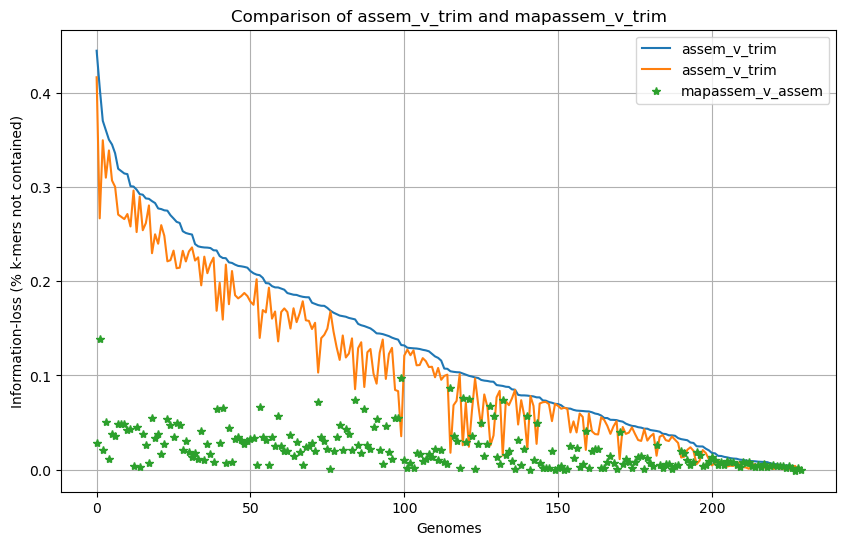

In [4]:
# If we sort one value as a baseline, then plot the other value on top of that
df = df.sort_values(by='assem_v_trim', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.plot(df.assem_v_trim, label='assem_v_trim')
plt.plot(df.mapassem_v_trim, label='assem_v_trim')
plt.plot(df.mapassem_v_assem, "*", label='mapassem_v_assem')

plt.xlabel('Genomes')
plt.ylabel('Information-loss (% k-mers not contained)')
plt.title('Comparison of assem_v_trim and mapassem_v_trim')
plt.legend()
plt.grid(True)
plt.show()

# Modification ideas (NTP):

do we really need to know the starting percentage? we could normalize all trim containment to 100%, since all other numbers are 'losses' from that 100%.

In [5]:
# normalize assem/mapassem containment by the starting (trimmed read) containment
df['norm_assem'] = df['assem_cont']/df['trim_cont']
df['norm_mapassem'] = df['mapassem_cont']/df['trim_cont']


# mpl version

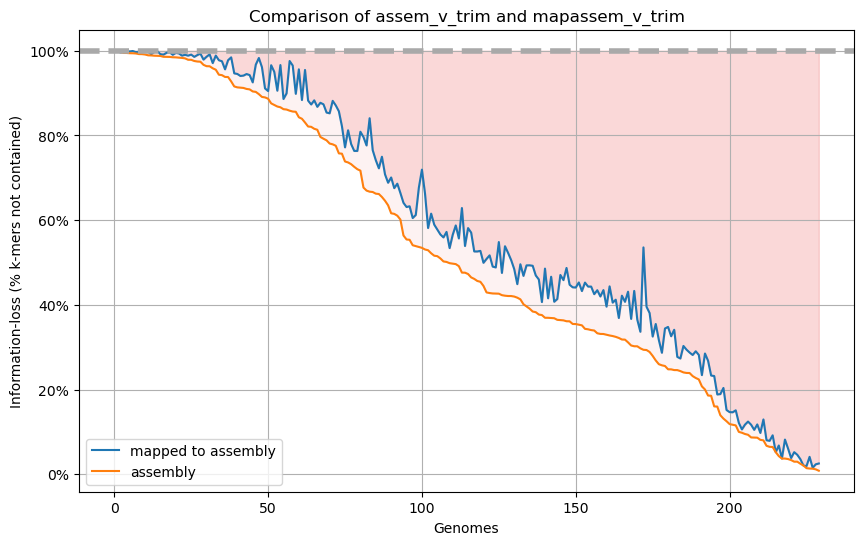

In [6]:
df = df.sort_values(by='norm_assem', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.plot(df.norm_mapassem, label='mapped to assembly')
plt.plot(df.norm_assem, label='assembly')
plt.axhline(y=1, color='darkgrey', linestyle='--', linewidth=4)  # Add horizontal line at y=1 for 100%
plt.fill_between(df.index, df['norm_mapassem'], 1, color='lightcoral', alpha=0.3)
plt.fill_between(df.index, df['norm_assem'], df['norm_mapassem'], color='lightcoral', alpha=0.1)

plt.xlabel('Genomes')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))  # Set y-axis ticks to display percentages
plt.ylabel('Information-loss (% k-mers not contained)')
plt.title('Comparison of assem_v_trim and mapassem_v_trim')
plt.legend()
plt.grid(True)
plt.show()

# seaborn version

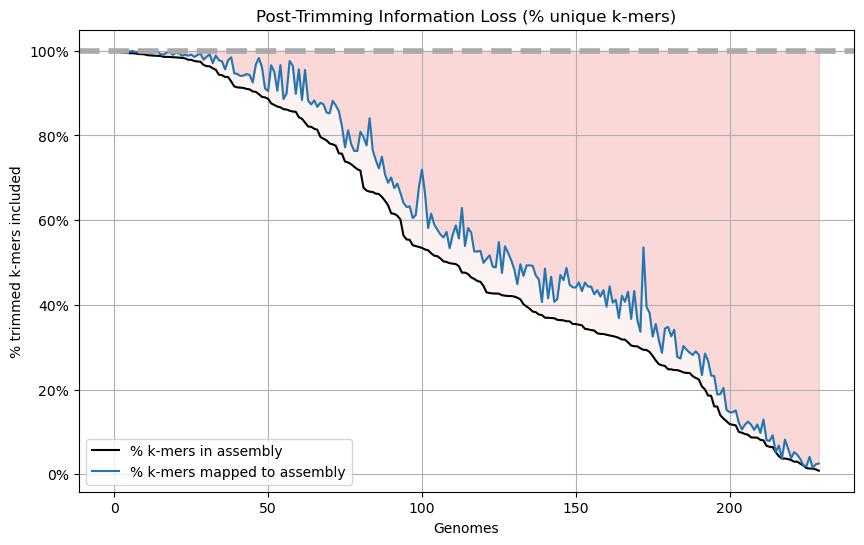

In [7]:
df = df.sort_values(by='norm_assem', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))

sns.lineplot(data=df['norm_assem'], label='% k-mers in assembly', color='black')
sns.lineplot(data=df['norm_mapassem'], label='% k-mers mapped to assembly')
plt.axhline(y=1, color='darkgrey', linestyle='--', linewidth=4)  # Add horizontal line at y=1 for 100%

plt.fill_between(df.index, df['norm_mapassem'], 1, color='lightcoral', alpha=0.3)
plt.fill_between(df.index, df['norm_assem'], df['norm_mapassem'], color='lightcoral', alpha=0.1)

plt.xlabel('Genomes')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))  # Set y-axis ticks to display percentages
plt.ylabel('% trimmed k-mers included')
plt.title('Post-Trimming Information Loss (% unique k-mers)')
plt.legend()
plt.grid(True)
plt.show()

### sort by mapassem instead to make that the smoother line

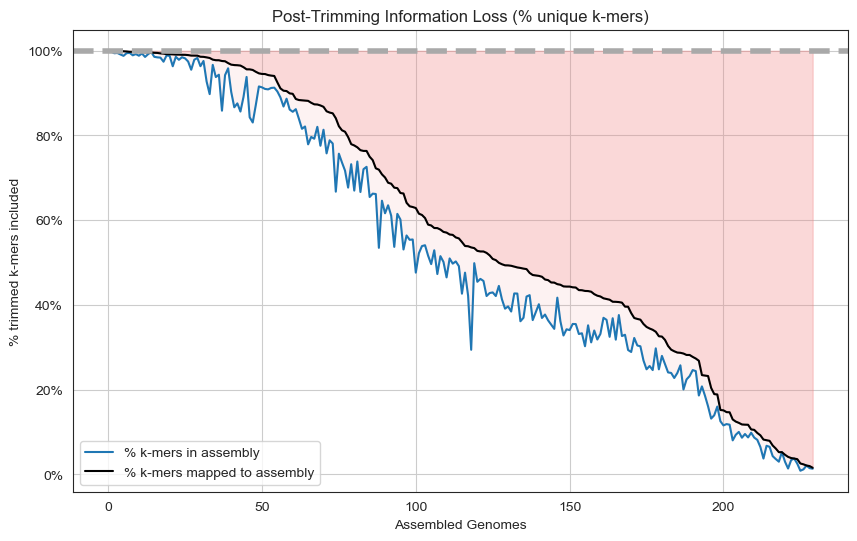

In [39]:
df = df.sort_values(by='norm_mapassem', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))

sns.lineplot(data=df['norm_assem'], label='% k-mers in assembly')
sns.lineplot(data=df['norm_mapassem'], label='% k-mers mapped to assembly', color='black')
plt.axhline(y=1, color='darkgrey', linestyle='--', linewidth=4)  # Add horizontal line at y=1 for 100%

plt.fill_between(df.index, df['norm_mapassem'], 1, color='lightcoral', alpha=0.3)
plt.fill_between(df.index, df['norm_assem'], df['norm_mapassem'], color='lightcoral', alpha=0.1)

plt.xlabel('Assembled Genomes')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))  # Set y-axis ticks to display percentages
plt.ylabel('% trimmed k-mers included')
plt.title('Post-Trimming Information Loss (% unique k-mers)')
plt.legend()
plt.grid(True)
plt.savefig('ERR505104.assembly-loss.png')
plt.show()

In [9]:
df.columns

Index(['genome', 'n_chrom', 'n_snps', 'n_genome_bp', 'n_missed_bp',
       'f_missed_bp', 'n_covered_bp', 'f_covered_bp', 'avg_coverage',
       'effective_coverage', 'genome_id', 'sample_id', 'n_mapped_reads',
       'n_diff_reads', '% assembled', 'n_diff3_read', '% map_to_assembly',
       'metagenome', 'trim_cont', 'assem_cont', 'mapassem_cont',
       'assem_v_trim', 'mapassem_v_trim', 'mapassem_v_assem',
       'coverage_category', 'norm_assem', 'norm_mapassem'],
      dtype='object')

### can we represent effective coverage? Is it informative/does it work with this graph?

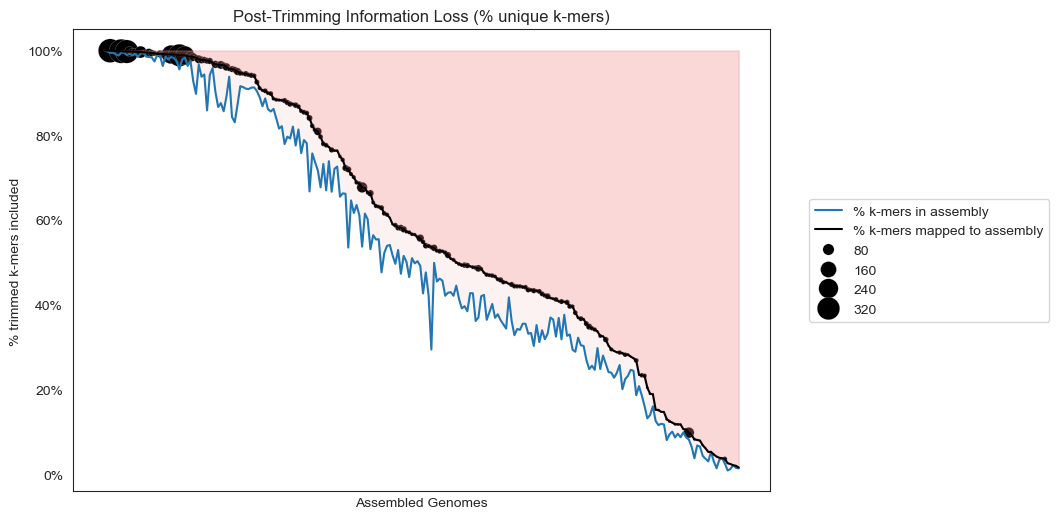

In [44]:
df = df.sort_values(by='norm_mapassem', ascending=False).reset_index(drop=True)

sns.set_style("white")
plt.figure(figsize=(9, 6))

sns.lineplot(data=df['norm_assem'], label='% k-mers in assembly')
# sns.scatterplot(data=df, x='genome', y='norm_assem', size='effective_coverage', sizes=(10,200), legend=False)

sns.lineplot(data=df['norm_mapassem'], label='% k-mers mapped to assembly', color='black')
sns.scatterplot(data=df, x='genome', y='norm_mapassem', size='effective_coverage',sizes=(1,300), color='black')#, legend=False)

# plt.axhline(y=1, color='darkgrey', linestyle='--', linewidth=4)  # Add horizontal line at y=1 for 100%

plt.fill_between(df.index, df['norm_mapassem'], 1, color='lightcoral', alpha=0.3)
plt.fill_between(df.index, df['norm_assem'], df['norm_mapassem'], color='lightcoral', alpha=0.1)

plt.xlabel('Assembled Genomes')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))  # Set y-axis ticks to display percentages
plt.ylabel('% trimmed k-mers included')
plt.title('Post-Trimming Information Loss (% unique k-mers)')
plt.xticks([]) # remove genome name labels
plt.legend(loc='right', bbox_to_anchor=(1.4, 0.5), borderaxespad=0)

plt.savefig('ERR505104.assembly-loss-cov.png', bbox_inches='tight')

plt.show()


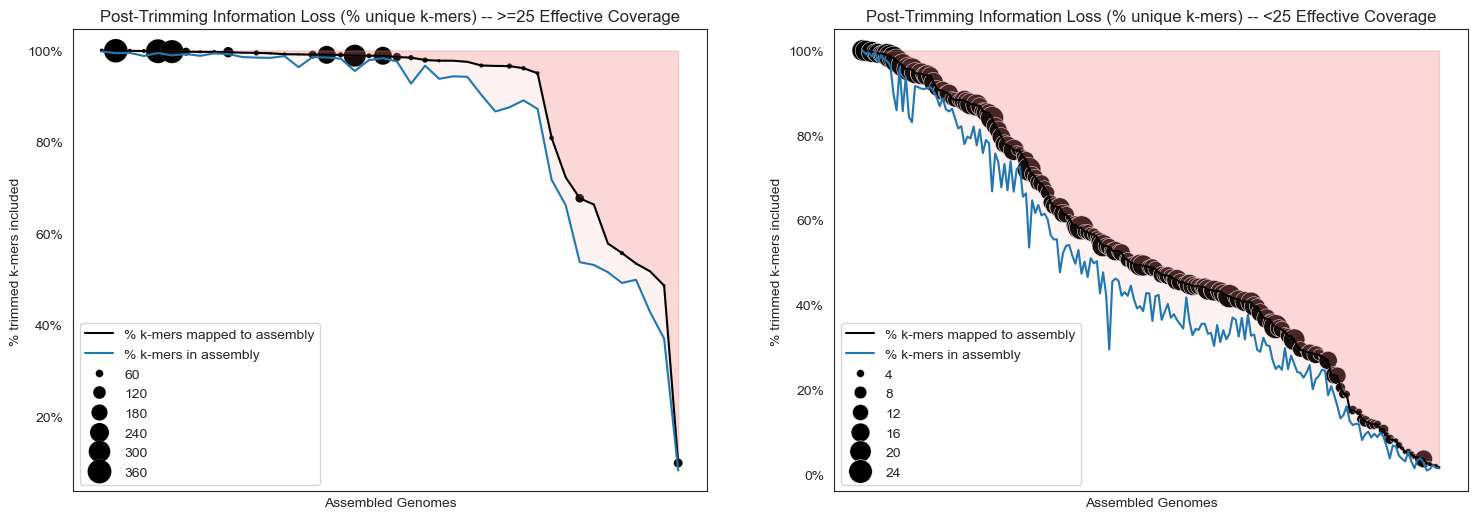

In [77]:
# Sort DataFrame
df = df.sort_values(by='norm_mapassem', ascending=False).reset_index(drop=True)

# Filter DataFrame based on effective coverage
high_coverage_df = df[df['effective_coverage'] >= 25]
low_coverage_df = df[df['effective_coverage'] < 25]

# Create two separate plots
plt.figure(figsize=(18, 6))

# Plot for high effective coverage
plt.subplot(1, 2, 1)
sns.lineplot(data=high_coverage_df, x='genome', y='norm_mapassem', label='% k-mers mapped to assembly', color='black')
sns.lineplot(data=high_coverage_df, x='genome', y='norm_assem', label='% k-mers in assembly')
sns.scatterplot(data=high_coverage_df, x='genome', y='norm_mapassem', size='effective_coverage', sizes=(1, 300), color='black')
plt.fill_between(high_coverage_df['genome'], high_coverage_df['norm_mapassem'], 1, color='lightcoral', alpha=0.3)
plt.fill_between(high_coverage_df['genome'], high_coverage_df['norm_assem'], high_coverage_df['norm_mapassem'], color='lightcoral', alpha=0.1)

plt.xlabel('Assembled Genomes')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.ylabel('% trimmed k-mers included')
plt.title('Post-Trimming Information Loss (% unique k-mers) -- >=25 Effective Coverage')
plt.xticks([])  # Remove genome name labels
plt.legend()
# plt.legend(loc='right', bbox_to_anchor=(1.4, 0.5), borderaxespad=0)

# Plot for low effective coverage
plt.subplot(1, 2, 2)
sns.lineplot(data=low_coverage_df, x='genome', y='norm_mapassem', label='% k-mers mapped to assembly', color='black')
sns.lineplot(data=low_coverage_df, x='genome', y='norm_assem', label='% k-mers in assembly')
sns.scatterplot(data=low_coverage_df, x='genome', y='norm_mapassem', size='effective_coverage', sizes=(1, 300), color='black')
plt.fill_between(low_coverage_df['genome'], low_coverage_df['norm_mapassem'], 1, color='lightcoral', alpha=0.3)
plt.fill_between(low_coverage_df['genome'], low_coverage_df['norm_assem'], low_coverage_df['norm_mapassem'], color='lightcoral', alpha=0.1)
plt.xlabel('Assembled Genomes')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.ylabel('% trimmed k-mers included')
plt.title('Post-Trimming Information Loss (% unique k-mers) -- <25 Effective Coverage')
plt.xticks([])  # Remove genome name labels
plt.legend(loc='lower left')#, bbox_to_anchor=(1.4, 0.5), borderaxespad=0)

# Save the plots to PNG file
plt.savefig('ERR505104.assembly-loss-cov2.png', bbox_inches='tight')

plt.show()